<center><img src="../../../images/hierarchical_clustering.png" alt="error" width="1000"/></center>

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [11]:
data = pd.read_csv('../../../datasets/Protein.csv',index_col=0)
data.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [12]:
scaler = StandardScaler()
milkscaled=scaler.fit_transform(data)

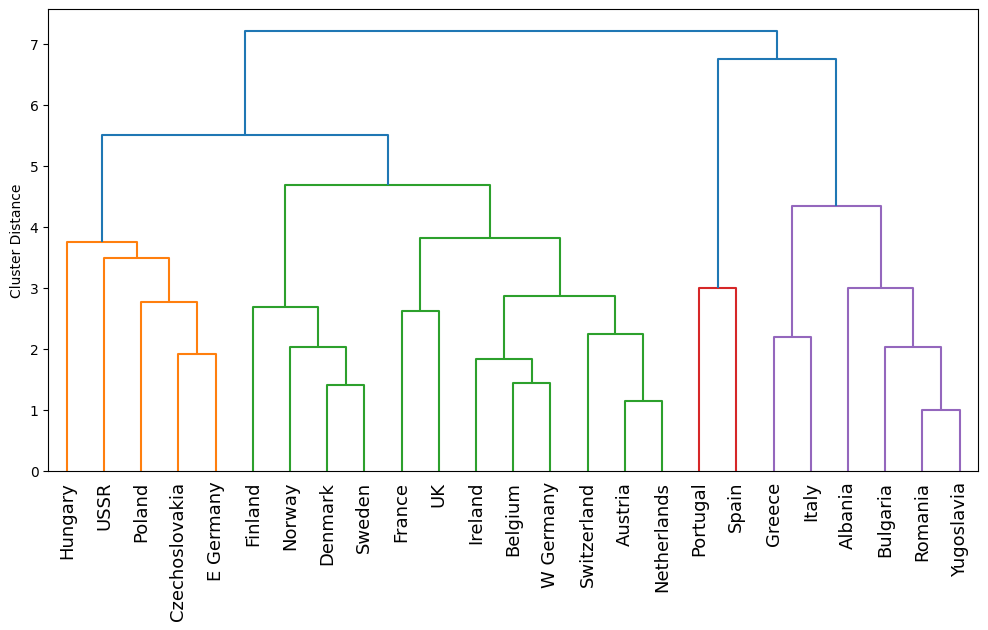

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate linkages and plot dendrogram
mergings = linkage(milkscaled, method='complete')

# Set figure size directly in the plot command
plt.figure(figsize=(12, 6))

# Plot dendrogram
dendrogram(mergings, labels=data.index, leaf_rotation=90, leaf_font_size=13)

# Add labels and display
plt.ylabel("Cluster Distance")
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [78]:
score = {}

for i in range(2,10):
    clustering = AgglomerativeClustering(n_clusters=i,
                                     linkage='average') 
    clustering.fit(milkscaled)
    score[i] = silhouette_score(milkscaled,clustering.labels_)

Text(0.5, 1.0, 'Silhouette Plot')

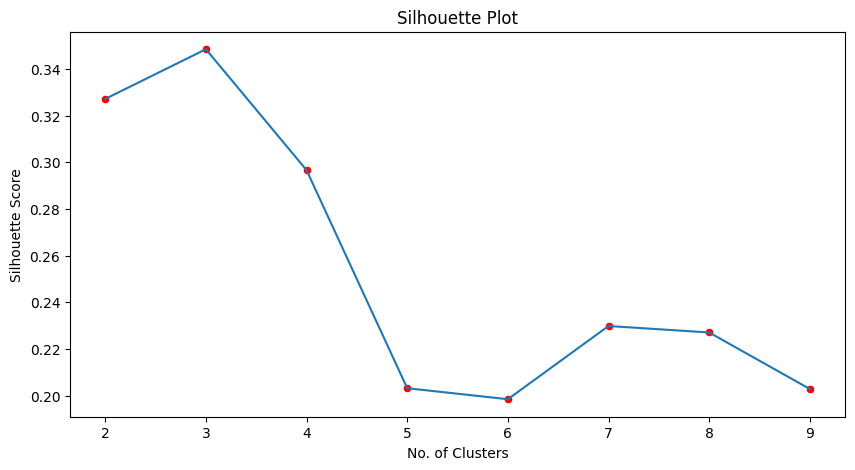

In [91]:
plt.figure(figsize=(10,5))
sns.lineplot(x=score.keys(),y=score.values())
sns.scatterplot(x=score.keys(),y=score.values(),color='red')
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot")

### More silhouette score means better result so we should choose 3 cluster as optimal value 